**Load data from csv file**

In [1]:
import pandas as pd # load dataset 
import matplotlib.pyplot as plt
import seaborn as sns # generate heat map

tableA = pd.read_csv('../3. Dataset No Outlier File/MeterA_no_outlier.csv', header='infer') # read MeterA csv file
tableA.drop(tableA.filter(regex="Unname"),axis=1, inplace=True)
tableALbl = tableA['Class Attruibute']
tableA = tableA.loc[:, tableA.columns != 'Class Attruibute']

tableB = pd.read_csv('../3. Dataset No Outlier File/MeterB_no_outlier.csv', header='infer') # read MeterB csv file
tableB.drop(tableB.filter(regex="Unname"),axis=1, inplace=True)
tableBLbl = tableB['Class Attruibute']
tableB = tableB.loc[:, tableB.columns != 'Class Attruibute']

tableC = pd.read_csv('../3. Dataset No Outlier File/MeterC_no_outlier.csv', header='infer') # read MeterC csv file
tableC.drop(tableC.filter(regex="Unname"),axis=1, inplace=True)
tableCLbl = tableC['Class Attruibute']
tableC = tableC.loc[:, tableC.columns != 'Class Attruibute']

tableC

,Profile factor,Symmetry,Crossflow,Flow Velocity1,Flow Velocity2,Flow Velocity3,Flow Velocity4,Speed of Sound1,Speed of Sound2,Speed of Sound3,...,Gain7,Gain8,Transit time1,Transit time2,Transit time3,Transit time4,Transit time5,Transit time6,Transit time7,Transit time8
0,1.102690,1.004425,1.006741,15.228611,16.676389,16.713056,15.051389,1485.447222,1485.416667,1485.491667,...,17.700000,17.700000,86.585833,85.576667,106.985000,105.530833,106.714444,105.255833,86.461111,85.460833
1,1.101432,1.003722,1.008256,14.106667,15.407500,15.473889,13.930833,1485.222222,1485.211111,1485.288889,...,17.700000,17.700000,86.560000,85.628056,106.942500,105.603611,106.676111,105.326667,86.433889,85.510556
2,1.098568,1.002528,1.009103,14.136667,15.388056,15.484444,13.965833,1485.061111,1485.047222,1485.133333,...,17.700000,17.700000,86.572222,85.635278,106.954722,105.614722,106.686389,105.336389,86.444722,85.519167
3,1.099516,1.007024,1.009363,14.146389,15.405000,15.439167,13.906111,1485.144444,1485.113889,1485.216667,...,17.700000,17.700000,86.566111,85.630833,106.952500,105.609444,106.681389,105.331667,86.439722,85.515833
4,1.100336,1.000661,1.006709,14.056944,15.363611,15.452222,13.948889,1485.202778,1485.180556,1485.272222,...,17.700000,17.700000,86.561111,85.630833,106.946667,105.603889,106.676111,105.328889,86.436944,85.512222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,1.102095,1.004424,1.008522,11.683194,12.818194,12.904722,14.426944,2675.100000,1484.806944,1353.600000,...,18.205556,18.205556,48.530000,47.070000,106.781806,105.769722,115.220000,117.400000,86.504167,85.547500
175,1.102095,1.004424,1.008522,11.683194,12.818194,12.904722,14.500278,2675.100000,1484.806944,1353.600000,...,18.200000,18.200000,48.530000,47.070000,106.781806,105.769722,115.220000,117.400000,86.504722,85.543333
176,1.102095,1.004424,1.008522,11.683194,12.818194,12.904722,14.382778,2675.100000,1484.806944,1353.600000,...,18.200000,18.200000,48.530000,47.070000,106.781806,105.769722,115.220000,117.400000,86.500000,85.543056
177,1.102095,1.004424,1.008522,11.683194,12.818194,12.904722,15.790556,2675.100000,1484.806944,1353.600000,...,18.786111,18.783333,48.530000,47.070000,106.781806,105.769722,115.220000,117.400000,86.533889,85.488333


<AxesSubplot:>

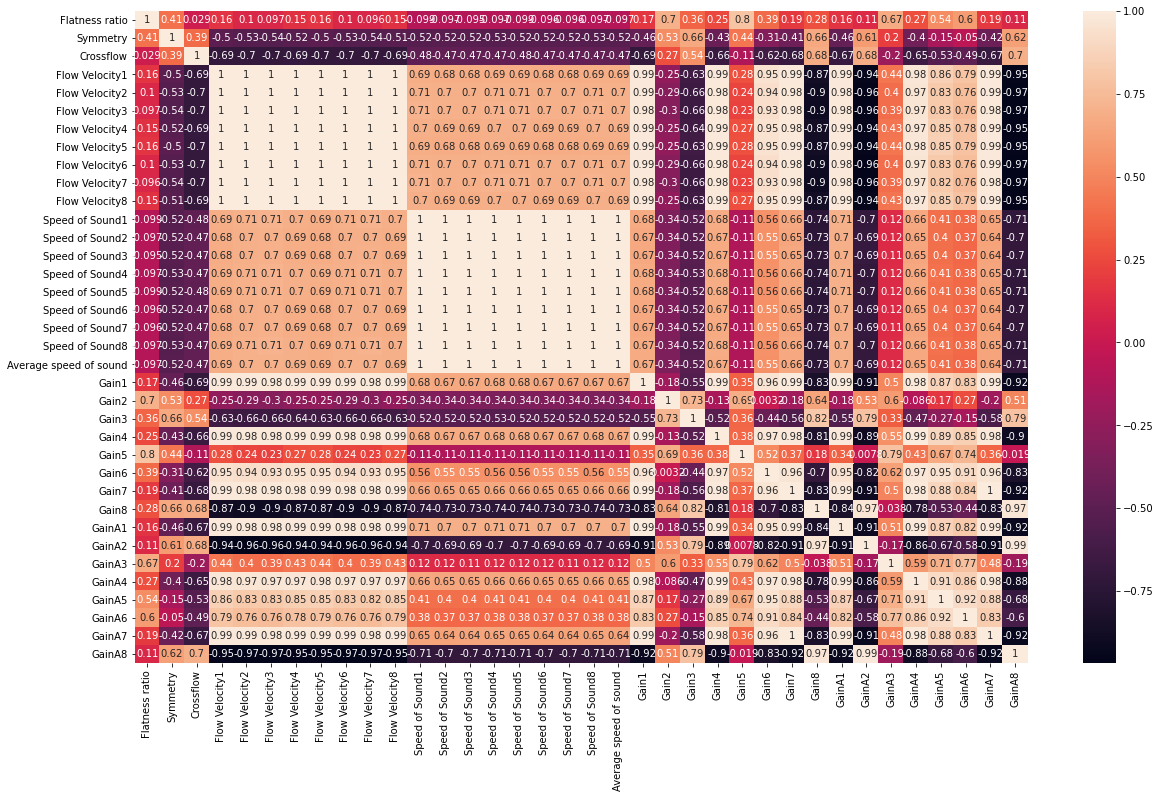

In [2]:
corrmatA = tableA.corr() # get correlation
plt.figure(figsize=(20,12)) 
sns.heatmap(corrmatA, annot=True)

In [3]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_maxtrix = dataset.corr()
    for i in range(len(corr_maxtrix.columns)):
        for j in range(i):
            if abs(corr_maxtrix.iloc[i,j])>threshold:
                colname = corr_maxtrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [4]:
corr_features_A = correlation(tableA, 0.9)
len(set(corr_features_A))
print('correlated features: ', len(set(corr_features_A)))
print('correlated features are ', corr_features_A)

correlated features:  26
correlated features are  {'Gain7', 'Flow Velocity4', 'GainA5', 'GainA4', 'Speed of Sound5', 'Speed of Sound4', 'GainA7', 'Flow Velocity8', 'GainA2', 'Speed of Sound3', 'Flow Velocity2', 'GainA6', 'Flow Velocity7', 'Speed of Sound6', 'Gain1', 'Speed of Sound7', 'Gain6', 'GainA1', 'Gain4', 'Flow Velocity6', 'Speed of Sound8', 'Speed of Sound2', 'GainA8', 'Flow Velocity3', 'Flow Velocity5', 'Average speed of sound'}


<AxesSubplot:>

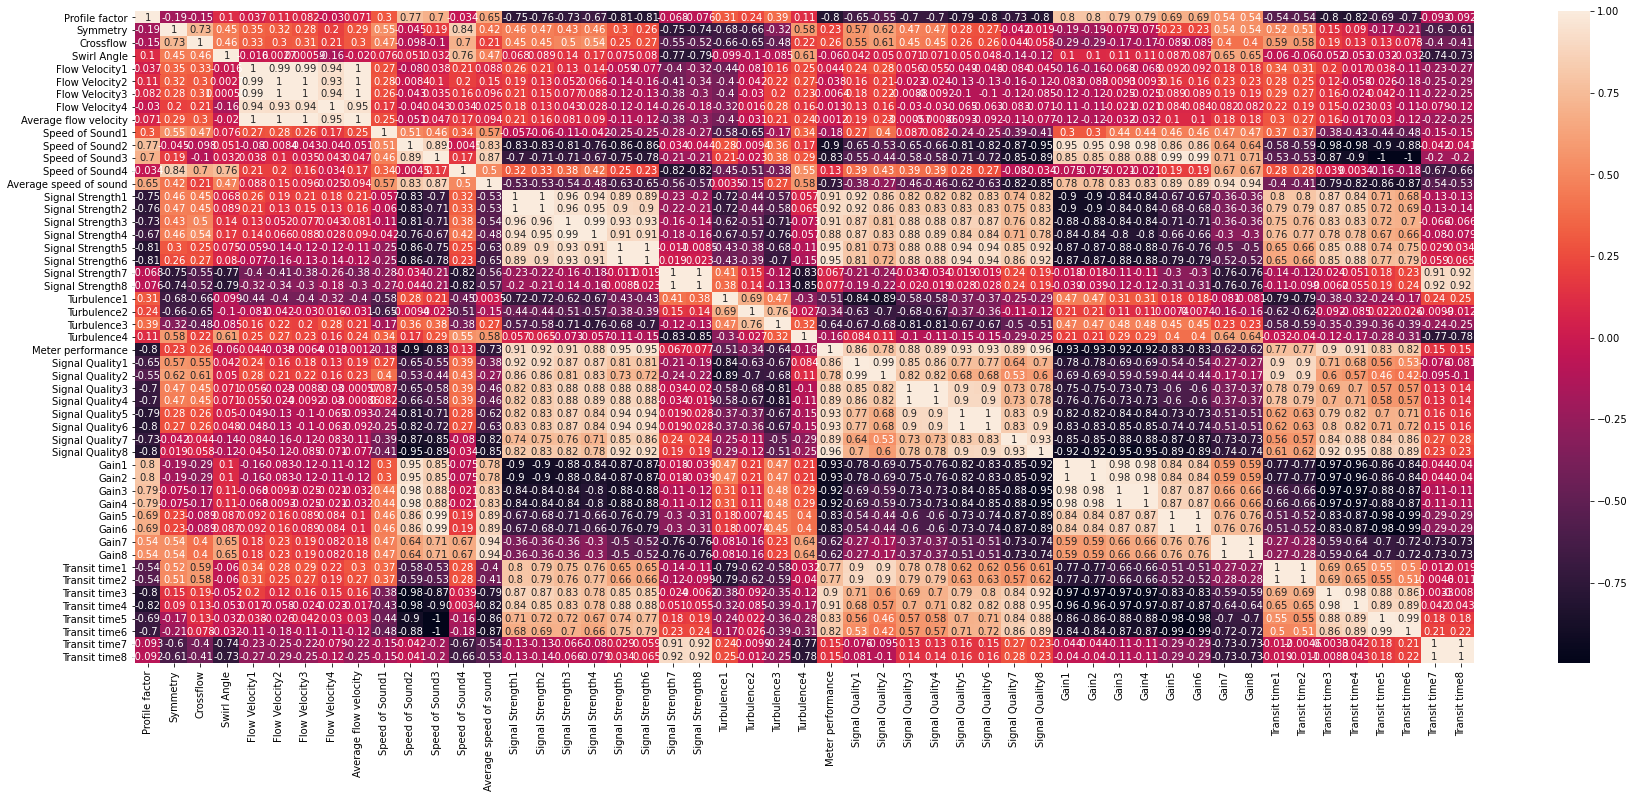

In [5]:
corrmatB = tableB.corr() # get correlation
plt.figure(figsize=(30,12)) 
sns.heatmap(corrmatB, annot=True)

In [6]:
corr_features_B = correlation(tableB, 0.9)
len(set(corr_features_B))
print('correlated features: ', len(set(corr_features_B)))
print('correlated features are ', corr_features_B)

correlated features:  33
correlated features are  {'Transit time5', 'Meter performance', 'Signal Quality2', 'Signal Strength4', 'Signal Strength8', 'Gain7', 'Flow Velocity4', 'Signal Strength3', 'Transit time1', 'Signal Quality6', 'Transit time7', 'Average flow velocity', 'Transit time4', 'Transit time8', 'Flow Velocity2', 'Gain3', 'Signal Quality5', 'Signal Strength6', 'Gain1', 'Signal Quality8', 'Gain6', 'Gain5', 'Signal Quality4', 'Gain4', 'Transit time3', 'Transit time6', 'Signal Strength2', 'Signal Quality1', 'Transit time2', 'Gain8', 'Gain2', 'Flow Velocity3', 'Signal Strength5'}


<AxesSubplot:>

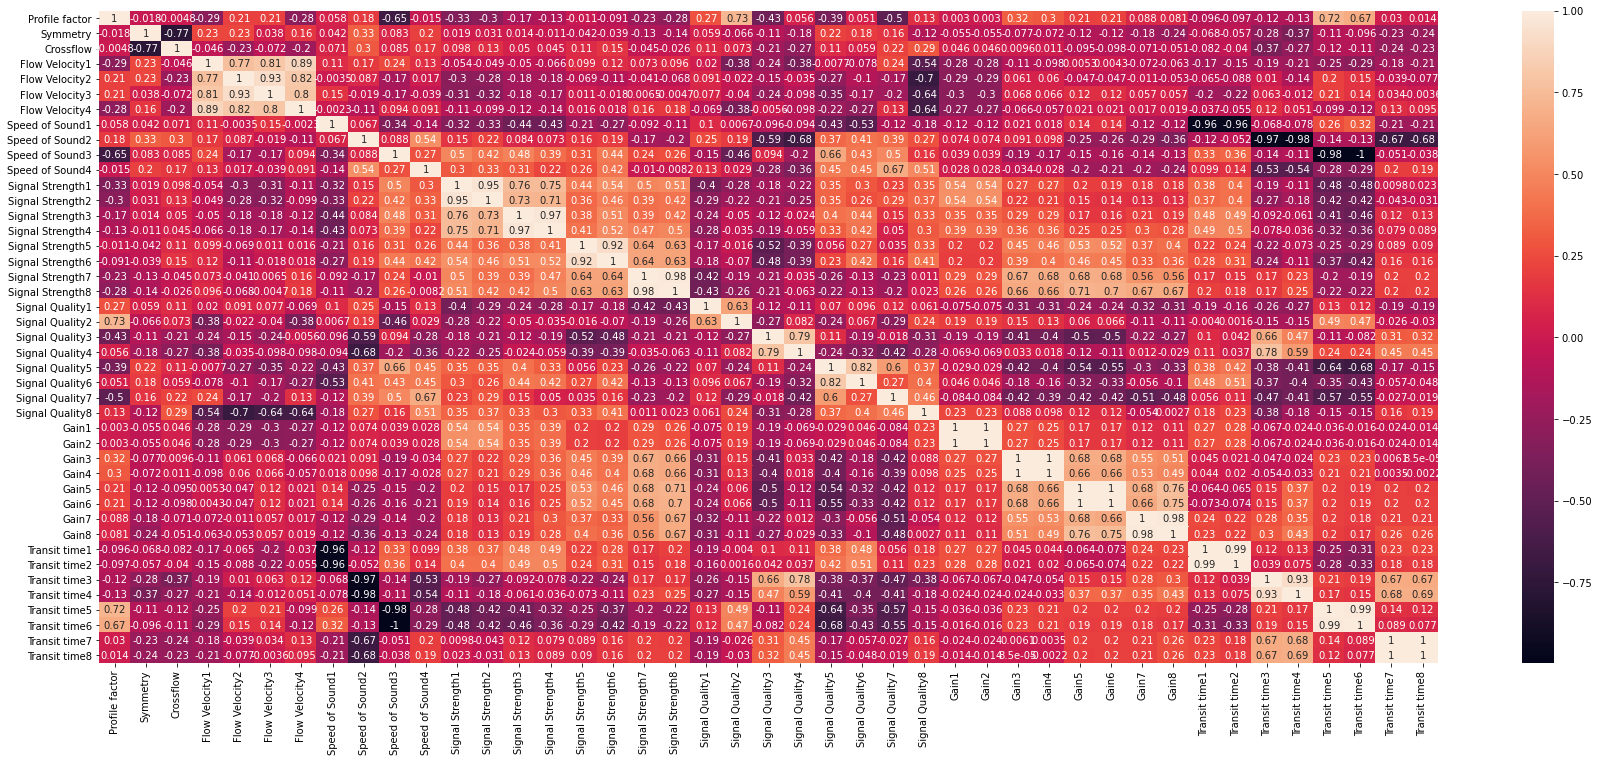

In [7]:
corrmatC = tableC.corr() # get correlation
plt.figure(figsize=(30,12)) 
sns.heatmap(corrmatC, annot=True)

In [8]:
corr_features_C = correlation(tableC, 0.9)
len(set(corr_features_C))
print('correlated features: ', len(set(corr_features_C)))
print('correlated features are ', corr_features_C)

correlated features:  16
correlated features are  {'Transit time2', 'Transit time5', 'Gain8', 'Gain6', 'Transit time3', 'Signal Strength4', 'Signal Strength8', 'Gain4', 'Transit time4', 'Transit time6', 'Transit time8', 'Gain2', 'Transit time1', 'Flow Velocity3', 'Signal Strength6', 'Signal Strength2'}


In [9]:
tableA = tableA.drop(corr_features_A, axis=1)
tableA = pd.concat([tableA, tableALbl], axis = 1)
tableB = tableB.drop(corr_features_B, axis=1)
tableB = pd.concat([tableB, tableBLbl], axis = 1)
tableC = tableC.drop(corr_features_C, axis=1)
tableC = pd.concat([tableC, tableCLbl], axis = 1)
print(tableA)
print(tableB)
print(tableC)

    Flatness ratio  Symmetry  Crossflow  Flow Velocity1  Speed of Sound1  \
0         0.841499  1.009367   0.993816        8.469805      1485.528500   
1         0.842250  1.006584   0.996605        7.531891      1486.042333   
2         0.840723  1.011647   0.998152        6.641699      1486.023667   
3         0.841119  1.017807   0.996812        5.687524      1484.898000   
4         0.840358  1.016534   0.996221        5.660385      1484.361333   
..             ...       ...        ...             ...              ...   
78        0.792929  1.006295   0.999666        2.696691      1484.752667   
79        0.792309  1.004472   0.999873        2.679006      1484.689000   
80        0.793471  1.009560   1.001110        2.691553      1484.638167   
81        0.796730  1.010570   0.999029        2.714849      1484.580167   
82        0.790194  1.004195   0.995537        1.781262      1484.490833   

        Gain2      Gain3      Gain5      Gain8     GainA3  Class Attruibute  
0   33.50

In [10]:
tableA = tableA.reset_index(drop=True)
tableA.to_csv('MeterA_feature_selection.csv', index = True)
tableB = tableB.reset_index(drop=True)
tableB.to_csv('MeterB_feature_selection.csv', index = True)
tableC = tableC.reset_index(drop=True)
tableC.to_csv('MeterC_feature_selection.csv', index = True)